In [2]:
from pyathena import connect
import pandas as pd
import configparser
import pickle

In [3]:
config = configparser.ConfigParser()
config.read('../access_keys.cfg')
AWS_ACCESS_KEY = config.get('aws', 'aws_access_key')
AWS_SECRET_KEY = config.get('aws', 'aws_secret_key')

In [5]:
from six.moves.urllib.parse import quote_plus
from sqlalchemy.engine import create_engine

SCHEMA_NAME = "yelp"
S3_STAGING_DIR = "s3://sairin.yelp.dataset/dataset"
AWS_REGION = "us-west-1"
conn_str = (
    "awsathena+rest://{aws_access_key_id}:{aws_secret_access_key}@"
    "athena.{region_name}.amazonaws.com:443/"
    "{schema_name}?s3_staging_dir={s3_staging_dir}&work_group=primary"
)


# Create the SQLAlchemy connection. Note that you need to have pyathena installed for this.
engine = create_engine(
    conn_str.format(
        aws_access_key_id=quote_plus(AWS_ACCESS_KEY),
        aws_secret_access_key=quote_plus(AWS_SECRET_KEY),
        region_name=AWS_REGION,
        schema_name=SCHEMA_NAME,
        s3_staging_dir=quote_plus(S3_STAGING_DIR),
    )
)
athena_connection = engine.connect()

/var/folders/69/1v36mqw920lcphv2lfprw2sw0000gp/T/ipykernel_87952/1193939181.py:15: SADeprecationWarning: The dbapi() classmethod on dialect classes has been renamed to import_dbapi().  Implement an import_dbapi() classmethod directly on class <class 'pyathena.sqlalchemy.rest.AthenaRestDialect'> to remove this warning; the old .dbapi() classmethod may be maintained for backwards compatibility.
  engine = create_engine(


In [6]:
query_phialdelphia_restaurants_top = """
        SELECT * 
        FROM yelp.philadelphia_top_restaurant
        """

runBlock = False
if runBlock:
    df_restaurant_philadelphia = pd.read_sql(query_phialdelphia_restaurants_top, athena_connection)
    df_restaurant_philadelphia.to_pickle('../src/data/top_restaurant_philadelphia.pkl')

df_restaurant_philadelphia = pd.read_pickle('../src/data/top_restaurant_philadelphia.pkl')

In [94]:
df_restaurant_philadelphia['count_review'] = df_restaurant_philadelphia.groupby('business_id')['text'].transform('count')
sorted_df_restaurant_philadelphia_top = df_restaurant_philadelphia.sort_values(by='count_review', ascending=True)

sorted_df_restaurant_philadelphia_top.head()

sample_df=sorted_df_restaurant_philadelphia_top.loc[sorted_df_restaurant_philadelphia_top['business_id']=='YBak8o0xCiNN4sXr3izLbg']

random_5_businesses=sorted_df_restaurant_philadelphia_top

# Sample 5 random businesses
random_5_businesses = df_restaurant_philadelphia['business_id'].drop_duplicates().sample(5)

# Filter the dataframe to only include rows from the 5 random businesses
random_5_sampled_reviews = df_restaurant_philadelphia[df_restaurant_philadelphia['business_id'].isin(random_5_businesses)]

random_5_sampled_reviews

,review_id,business_id,stars,text,name,address,city,state,latitude,longitude,count_review
832,JR8snVDSQ96RKPA-27iVmg,kVTHnhgYUw-Pmr7wgDB4_g,5.0,"I love this place. The quac is awesome, marga...",Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127
835,4raVNBKVM7juVH5jmrMzwQ,kVTHnhgYUw-Pmr7wgDB4_g,4.0,"Very hip and chic, not at all what I expected ...",Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127
839,nTbeHQbBEtfh2UMvDiha0g,kVTHnhgYUw-Pmr7wgDB4_g,3.0,"It's good, but not great. I didn't find the f...",Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127
845,U-uNzbMBS2MLxAY-wrRdXQ,kVTHnhgYUw-Pmr7wgDB4_g,5.0,I dragged my parents there kicking and screami...,Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127
846,aEC_vQUHYQSJ0-GGPCK_bQ,kVTHnhgYUw-Pmr7wgDB4_g,4.0,I've been to Distrito twice in the past month ...,Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127
...,...,...,...,...,...,...,...,...,...,...,...
250347,Nhk7mJ_wE8g4qviR5YvYmA,-cEFKAznWmI0cledNOIQ7w,1.0,We waited 20 minutes for a table despite havin...,Gran Caffe L'Aquila,1716 Chestnut St,Philadelphia,PA,39.951279,-75.169518,1182
250348,bqH34B4qb_duGaHJUspnKw,-cEFKAznWmI0cledNOIQ7w,5.0,We stopped by to get gelato and it was delish!...,Gran Caffe L'Aquila,1716 Chestnut St,Philadelphia,PA,39.951279,-75.169518,1182
250349,ClUt5WxqRGucZHJE11ph7Q,-cEFKAznWmI0cledNOIQ7w,4.0,We chose to sit outdoors in the seating was a ...,Gran Caffe L'Aquila,1716 Chestnut St,Philadelphia,PA,39.951279,-75.169518,1182
250350,_6LTPJS90ziUpqv-TRN60g,-cEFKAznWmI0cledNOIQ7w,4.0,This place is top notch. The options for Itali...,Gran Caffe L'Aquila,1716 Chestnut St,Philadelphia,PA,39.951279,-75.169518,1182


In [99]:
from asqp_generator import ASQPGenerator

assistant = ASQPGenerator(url="http://subhagato-desktop.local:7860/completion")

sentiment = assistant.get_sentiment("""The price is reasonable although the service is poor.""", temp=0.1, top_k=10)
print(sentiment)

[('price', 'restaurant prices', 'positive', 'reasonable'), ('service', 'service general', 'negative', 'poor')]


In [101]:
from asqp_generator import ASQPGenerator
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from tqdm import tqdm

if False:
    def num_tokens(text):
        return len(text.split())

    def split_by_sentence(s):
        # Splitting the string using . and ;
        sentences = sent_tokenize(s)

        # Stripping whitespace, and removing ' and "
        return [sentence.strip().replace('\'', '').replace('\"', '') for sentence in sentences if sentence.strip()]


    # Initialize the assistant for sentiment analysis
    assistant = ASQPGenerator(url="http://subhagato-desktop.local:7860/completion")

    # Create an empty list to store sentiment values
    llm_output = []

    # Loop through each row in the data frame and get sentiment for each text
    for idx, row in tqdm(random_5_sampled_reviews.iterrows(), total=random_5_sampled_reviews.shape[0]):
        sentences = split_by_sentence(row['text'])
        sentiment = []
        for text in sentences:
            try:
                sentiment.extend(assistant.get_sentiment(text, temp=0.0, top_k=1))
            except Exception as e:
                # Handle the exception here
                print(f"Error processing sentiment for text: {text}. Error: {e}")
        llm_output.append(list(set(sentiment)))


    # Add the sentiments list as a new column in the data frame
    random_5_sampled_reviews['llm_response'] = llm_output

    # Print the updated data frame
    random_5_sampled_reviews.head()

    random_5_sampled_reviews.to_pickle("llm_response_5_businesses.pkl")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sairindhri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
from collections import defaultdict
import ast  # to convert string representation to actual list if needed

# Initialize the defaultdict with three zeros.
sentiment_dict = defaultdict(lambda: [0, 0, 0])
aspect_dict = defaultdict(lambda: [0, 0])
sample_df = pd.read_pickle('llm_response_5_businesses.pkl')
aspect_categories = ["ambience general", "drinks prices", "drinks quality", "drinks style_options", "food prices", "food quality", "food style_options", "location general", "restaurant general", "restaurant miscellaneous", "restaurant prices", "service general"]

# Iterate over the data to populate the dictionary.
for response_data in sample_df['llm_response']:
    # Convert string representation of list to actual list (if necessary)
    if isinstance(response_data, str):
        response_data = ast.literal_eval(response_data)
    if not isinstance(response_data, list):  # if there's only one tuple, make it a list for uniform processing
        response_data = [response_data]
    for data in response_data:
        if data and isinstance(data, tuple) and len(data) == 4:
            aspect_term, aspect_category, sentiment, opinion = data
            if aspect_category in aspect_categories:
                if sentiment == 'positive':
                    sentiment_dict[aspect_category][0] += 1
                    aspect_dict[aspect_term.lower()][0] += 1
                elif sentiment == 'negative':
                    sentiment_dict[aspect_category][1] += 1
                    aspect_dict[aspect_term.lower()][1] += 1
                elif sentiment == 'neutral':
                    sentiment_dict[aspect_category][2] += 1
        else:
            print(f"Unexpected data format: {data}")  # just to notify of unexpected data formats
del aspect_dict['null']
sample_df.head()

,review_id,business_id,stars,text,name,address,city,state,latitude,longitude,count_review,llm_response
832,JR8snVDSQ96RKPA-27iVmg,kVTHnhgYUw-Pmr7wgDB4_g,5.0,"I love this place. The quac is awesome, marga...",Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127,"[(margaritas, drinks quality, positive, delici..."
835,4raVNBKVM7juVH5jmrMzwQ,kVTHnhgYUw-Pmr7wgDB4_g,4.0,"Very hip and chic, not at all what I expected ...",Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127,"[(NULL, food quality, positive, tasty), (NULL,..."
839,nTbeHQbBEtfh2UMvDiha0g,kVTHnhgYUw-Pmr7wgDB4_g,3.0,"It's good, but not great. I didn't find the f...",Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127,"[(margaritas, drinks quality, positive, strong..."
845,U-uNzbMBS2MLxAY-wrRdXQ,kVTHnhgYUw-Pmr7wgDB4_g,5.0,I dragged my parents there kicking and screami...,Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127,"[(guacamole, food quality, positive, NULL), (f..."
846,aEC_vQUHYQSJ0-GGPCK_bQ,kVTHnhgYUw-Pmr7wgDB4_g,4.0,I've been to Distrito twice in the past month ...,Distrito,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003,1127,"[(bathroom, restaurant miscellaneous, neutral,..."


In [125]:
import pandas as pd
from collections import defaultdict
import ast  # to convert string representation to actual list if needed
from collections import defaultdict, Counter

sample_df = pd.read_pickle('llm_response_5_businesses.pkl')
aspect_categories = ["ambience general", "drinks prices", "drinks quality", "drinks style_options", "food prices", "food quality", "food style_options", "location general", "restaurant general", "restaurant miscellaneous", "restaurant prices", "service general"]

def create_dicts(row):
    # Initialize the defaultdicts for each row
    sentiment_dict = defaultdict(lambda: [0, 0, 0])
    aspect_dict = defaultdict(lambda: [0, 0])
    
    # Populate the dictionaries
    for response_data in row['llm_response']:
        # Convert string representation of list to actual list (if necessary)
        if isinstance(response_data, str):
            response_data = ast.literal_eval(response_data)
        if not isinstance(response_data, list):  # if there's only one tuple, make it a list for uniform processing
            response_data = [response_data]
        for data in response_data:
            if data and isinstance(data, tuple) and len(data) == 4:
                aspect_term, aspect_category, sentiment, opinion = data
                if aspect_category in aspect_categories:
                    if sentiment == 'positive':
                        sentiment_dict[aspect_category][0] += 1
                        aspect_dict[aspect_term.lower()][0] += 1
                    elif sentiment == 'negative':
                        sentiment_dict[aspect_category][1] += 1
                        aspect_dict[aspect_term.lower()][1] += 1
                    elif sentiment == 'neutral':
                        sentiment_dict[aspect_category][2] += 1
            else:
                print(f"Unexpected data format: {data}")  # just to notify of unexpected data formats
    
    # Clean up
    if 'null' in aspect_dict:
        del aspect_dict['null']

    return pd.Series({'sentiment_dict': dict(sentiment_dict), 'aspect_dict': dict(aspect_dict)})

# Create the new columns
new_columns = sample_df.apply(create_dicts, axis=1)

# Add the new columns to the original DataFrame
sample_df = pd.concat([sample_df, new_columns], axis=1)
# Function to get the stars counter for each business_id group
def get_stars_counter(stars_series):
    # Count stars for the series and ensure a count for 0
    counter = Counter(stars_series)
    return dict(counter)

# Group by business_id and aggregate the dictionaries
# This step is a bit tricky because aggregating dictionaries isn't as straightforward as numeric data.
def merge_dicts(series_of_dicts):
    merged_dict = defaultdict(lambda: [0, 0, 0])  # for sentiment_dict
    for d in series_of_dicts:
        for key, value in d.items():
            merged_dict[key] = [sum(x) for x in zip(merged_dict[key], value)]
    return dict(merged_dict)

sample_df['avg_stars'] = sample_df['stars']


grouped = sample_df.groupby('business_id').agg({
    'name':'first',
    'sentiment_dict': merge_dicts,
    'aspect_dict': merge_dicts,
    'stars': get_stars_counter,
    'avg_stars': 'mean',
    'name':'first',
    'address':'first',
    'city':'first',
    'state':'first',
    'latitude':'first',
    'longitude':'first'

}).reset_index()
grouped.head()



,business_id,name,sentiment_dict,aspect_dict,stars,avg_stars,address,city,state,latitude,longitude
0,-cEFKAznWmI0cledNOIQ7w,Gran Caffe L'Aquila,"{'ambience general': [671, 306, 91], 'restaura...","{'italian atmosphere': [1, 0], 'bar stools': [...","{4.0: 265, 5.0: 723, 2.0: 52, 1.0: 51, 3.0: 91}",4.317259,1716 Chestnut St,Philadelphia,PA,39.951279,-75.169518
1,_k1CIuPkY-uLFm8lABFG8Q,Bonchon Philadelphia,"{'service general': [403, 590, 83], 'food qual...","{'sea food fried rice': [1, 0], 'girls': [1, 1...","{3.0: 116, 1.0: 82, 4.0: 196, 2.0: 69, 5.0: 172}",3.483465,1020 Cherry St,Philadelphia,PA,39.954502,-75.156990
2,kVTHnhgYUw-Pmr7wgDB4_g,Distrito,"{'drinks quality': [500, 91, 15], 'restaurant ...","{'margaritas': [177, 44], 'menu': [90, 43], 'p...","{5.0: 317, 4.0: 427, 3.0: 196, 2.0: 129, 1.0: 58}",3.724046,3945 Chestnut St,Philadelphia,PA,39.955881,-75.202003
3,poviu-6n3iaRE4gdQz6OYw,Oyster House,"{'restaurant miscellaneous': [1223, 441, 1069]...","{'shucking': [1, 1], 'oysters': [868, 105], 't...","{1.0: 48, 5.0: 694, 4.0: 544, 2.0: 43, 3.0: 142}",4.218899,1516 Sansom St,Philadelphia,PA,39.950222,-75.166553
4,wbDRmtxaKRpBOjutvV6TEA,Barclay Prime,"{'restaurant miscellaneous': [759, 293, 628], ...","{'champagne': [21, 10], 'service': [385, 62], ...","{5.0: 536, 4.0: 150, 3.0: 56, 2.0: 36, 1.0: 27}",4.406211,237 S 18th St,Philadelphia,PA,39.948710,-75.170874


In [128]:
grouped.to_pickle("../src/data/5_restaurants_aggregated.pkl")

In [129]:
grouped.iloc[0]['sentiment_dict']

{'ambience general': [671, 306, 91],
 'restaurant general': [1235, 99, 89],
 'restaurant miscellaneous': [999, 350, 685],
 'food style_options': [754, 258, 266],
 'food quality': [5168, 825, 264],
 'service general': [1245, 617, 102],
 'drinks quality': [413, 47, 9],
 'location general': [14, 9, 10],
 'drinks style_options': [281, 33, 46],
 'food prices': [91, 106, 16],
 'restaurant prices': [95, 124, 40],
 'drinks prices': [21, 25, 7]}

In [90]:
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

aspect_df = pd.DataFrame.from_dict(aspect_dict, orient='index', columns=['Positive Count', 'Negative Count']).reset_index().rename(columns={'index': 'Aspect'})
# 

aspect_df['Total Count'] = aspect_df[['Positive Count', 'Negative Count']].sum(axis=1)

# aspect_df.sort_values(by='Total Count', ascending=False, inplace=True)

def truncate_to_75_percent(df):
    # Sort the dataframe based on 'Total Count' in descending order
    df_sorted = df.sort_values(by='Total Count', ascending=False).reset_index(drop=True)
    
    # Calculate the sum of the 'Total Count' column
    total_sum = df_sorted['Total Count'].sum()

    # Calculate 90% of the total_sum
    ninety_percent_sum = 0.75 * total_sum

    print("total_sum = ", total_sum, "ninety_percent_sum = ", ninety_percent_sum)

    # Iterate through rows to find how many rows to truncate
    accumulated_sum = 0
    rows_to_capture = 0
    for index, row in df_sorted.iterrows():
        accumulated_sum += row['Total Count']
        if accumulated_sum >= ninety_percent_sum:
            rows_to_capture = index + 1
            break
    
    print("rows to capture = ", rows_to_capture)
    # Return the truncated dataframe
    return df_sorted.head(rows_to_capture)

# df = truncate_to_75_percent(aspect_df)

df = aspect_df.sort_values(by='Total Count', ascending=False).head(200)

# aspect_df['Embeddings'] = aspect_df['Aspect'].apply(lambda x: bert_model.encode(x))

df

,Aspect,Positive Count,Negative Count,Total Count
13,games,170,62,232
27,place,160,47,207
4,barcade,144,37,181
7,beer,128,31,159
16,food,75,45,120
...,...,...,...,...
354,kitchen,1,1,2
319,barbecue chips,0,2,2
336,bar arcade concept,2,0,2
355,cook,1,1,2


In [92]:
df.to_pickle("../src/data/lama_df.pkl")

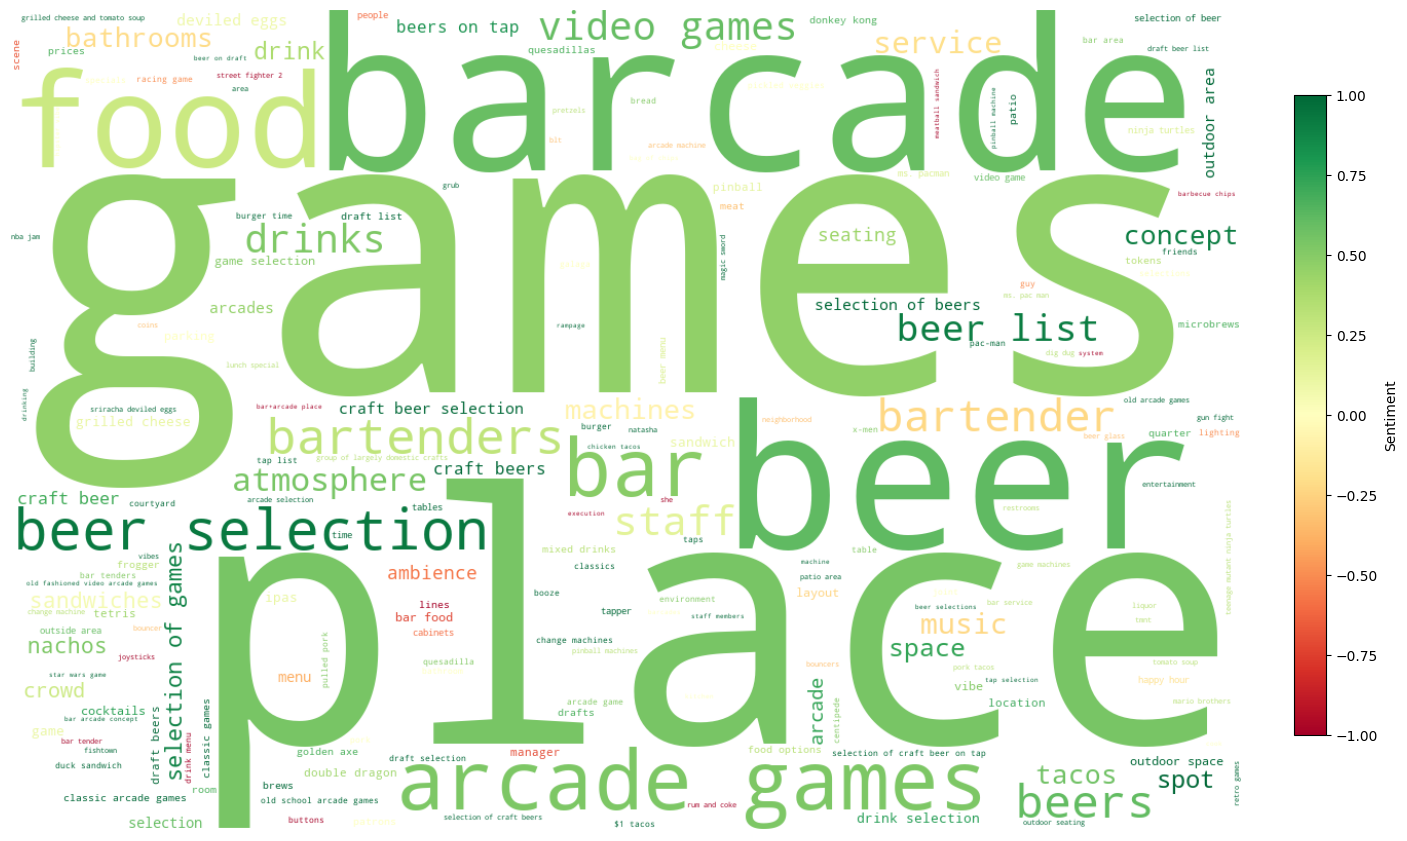

In [88]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib

# Convert the dataframe into dictionary {word: frequency}
freq = df.set_index('Aspect')['Total Count'].to_dict()

# Get the colormap
colormap = matplotlib.colormaps['RdYlGn']

# Calculate the color scale value
df['Colormap Value'] = df.apply(lambda row: matplotlib.colors.rgb2hex(colormap(((row['Positive Count'] - row['Negative Count']) / row['Total Count'] + 1) / 2)[:3]), axis=1)

def color_func(word, **kwargs):
    return df[df['Aspect'] == word]['Colormap Value'].values[0]

wordcloud = WordCloud(width=1200, height=800, background_color="white", color_func=color_func).generate_from_frequencies(freq)

# Plotting
fig, ax = plt.subplots(figsize=(16, 10.666667))
# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

# Create a new axis for the colorbar beside the word cloud
cax = fig.add_axes([0.93, 0.2, 0.02, 0.6])
# Display the colorbar
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=colormap, orientation='vertical', norm=matplotlib.colors.Normalize(vmin=-1, vmax=1))
cb.set_label('Sentiment')

plt.show()

In [ ]:
def truncate_to_90_percent(df):
    # Sort the dataframe based on 'Total Count' in descending order
    df = df.sort_values(by='Total Count', ascending=False, inplace=True).reset_index(drop=True)
    
    # Calculate the sum of the 'Total Count' column
    total_sum = df['Total Count'].sum()

    # Calculate 90% of the total_sum
    ninety_percent_sum = 0.9 * total_sum

    # Iterate through rows to find how many rows to truncate
    accumulated_sum = 0
    rows_to_capture = 0
    for index, row in df.iterrows():
        accumulated_sum += row['Total Count']
        if accumulated_sum >= ninety_percent_sum:
            rows_to_capture = index + 1
            break
            
    # Return the truncated dataframe
    return df.head(rows_to_capture)

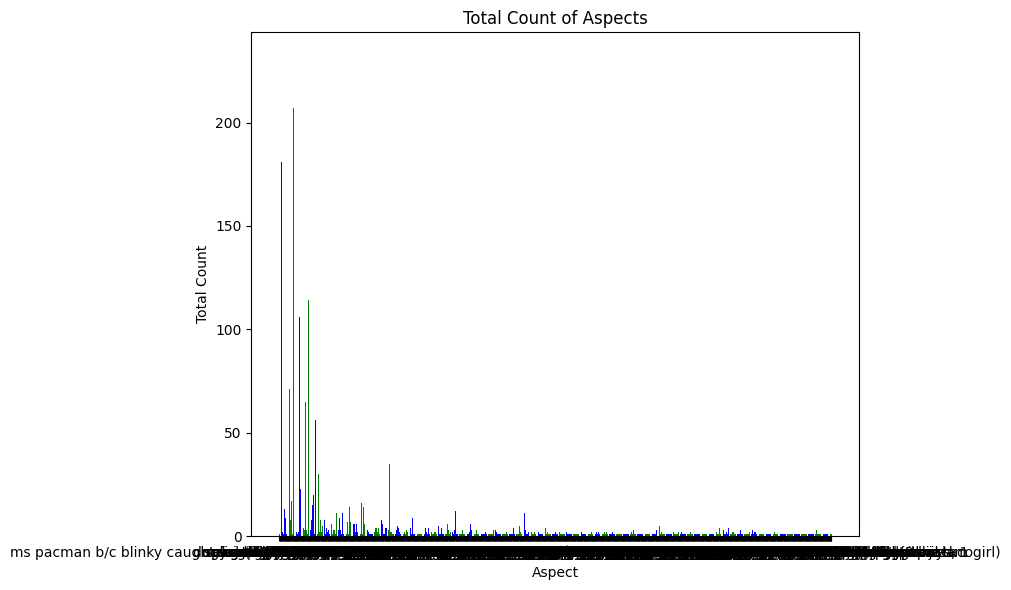

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(aspect_df['Aspect'], aspect_df['Total Count'], color=['blue', 'green'])
plt.xlabel('Aspect')
plt.ylabel('Total Count')
plt.title('Total Count of Aspects')
plt.tight_layout()

plt.show()

In [12]:
topics = aspect_df['Aspect'].to_list()

In [16]:
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Assuming aspects is your list of topics
topics = aspect_df['Aspect'].to_list()
aspects = topics # Truncated for brevity

# Convert the list of topics into a format suitable for the Dictionary class
processed_aspects = [[aspect] for aspect in aspects]

# Create the dictionary and corpus
dictionary = corpora.Dictionary(processed_aspects)
corpus = [dictionary.doc2bow(doc) for doc in processed_aspects]

# Train the LDA model
num_topics = 5  # Reduced the number of topics since we have less data
passes = 10

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Visualize the results
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


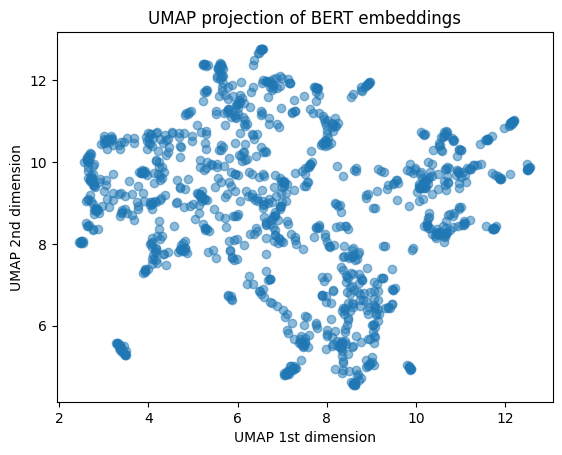

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

data = np.array(aspect_df['Embeddings'].to_list())

# Create UMAP instance and reduce dimensionality to 2D
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
data_2d = reducer.fit_transform(data)

# Convert to DataFrame for easier handling
df_2d = pd.DataFrame(data_2d, columns=["dim1", "dim2"])

# Plot the results
plt.scatter(df_2d["dim1"], df_2d["dim2"], alpha=0.5)
plt.title('UMAP projection of BERT embeddings')
plt.xlabel('UMAP 1st dimension')
plt.ylabel('UMAP 2nd dimension')
plt.show()

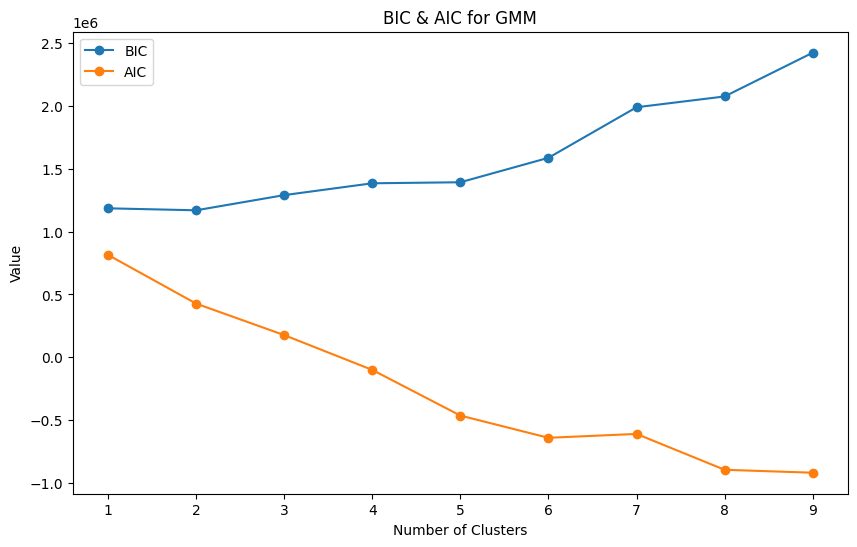

In [37]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Extracting embeddings and scaling
X = pd.DataFrame(aspect_df['Embeddings'].to_list())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute BIC and AIC for various number of components
n_components_range = range(1, 10)  # Adjust this range according to your data
bics = []
aics = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))

# Plot BIC and AIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Value')
plt.title('BIC & AIC for GMM')
plt.legend()
plt.show()

In [40]:
# Apply Gaussian Mixture Model clustering
n_components = 7  # Choose the number of components (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=42)
aspect_df['Cluster'] = gmm.fit_predict(X_scaled)

print(aspect_df)

                        Aspect  Positive Count  Negative Count  Total Count  \
13                       games             149              59          208   
27                       place             158              47          205   
4                      Barcade             130              35          165   
7                         beer             120              29          149   
16                        food              70              43          113   
...                        ...             ...             ...          ...   
512             videogame list               1               0            1   
513          shortrib sandwich               1               0            1   
514                   Arkanoid               1               0            1   
515   list of old school games               1               0            1   
1097     parking on the street               0               1            1   

                                             Embedd

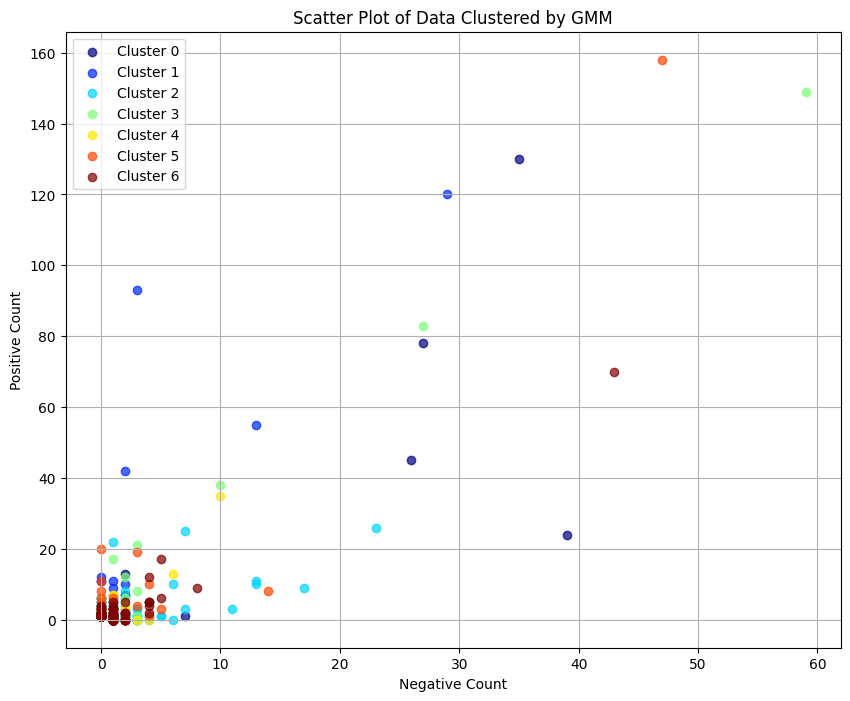

In [42]:
import matplotlib.pyplot as plt

# Generate a list of distinct colors, you might want to use a predefined color palette or modify this
colors = plt.cm.jet(np.linspace(0, 1, 7))

plt.figure(figsize=(10, 8))

# Plot each cluster
for cluster_num in range(7):
    cluster_data = aspect_df[aspect_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Negative Count'], cluster_data['Positive Count'], 
                label=f'Cluster {cluster_num}', alpha=0.7, color=colors[cluster_num])

plt.xlabel('Negative Count')
plt.ylabel('Positive Count')
plt.title('Scatter Plot of Data Clustered by GMM')
plt.legend()
plt.grid(True)
plt.show()